In [2]:
#!/usr/bin/env python
%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt


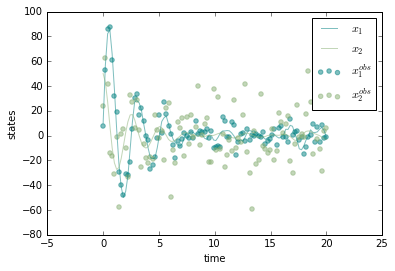

In [3]:
#make a model for dynamics

t=np.linspace(0,20,100) #time points

num_states=2 #how many state variables

x0=np.matrix([[10.],[50.]]) #initial conditions

w=np.matrix([[2],[0.1]]); #process noise
ep=np.matrix([[7],[20]]); #measurement noise

dt=t[1]
F=np.matrix([[0.7,1],[-0.2,0.9]]) #matrix evolution \dot{x}=Fx without noise

true_states=np.zeros([len(t),num_states]); obs_states=np.zeros([len(t),num_states]); #arrays

H=np.matrix([[1.,0],[0,1]]) #measurement matrix x_{obs} = Hx 

x=x0 #initialize
for i in range(len(t)):

    true_states[i,:]=x[0,0],x[1,0] #keep a list of the true state values
    
    m=H*x + np.matrix(np.random.normal(0,ep,[2,1])) #make the measurement
    
    obs_states[i,:]=m[0,0],m[1,0] #keep a list of the observed state values

    x= F*x + np.matrix(np.random.normal(0,w,[2,1])) #update the true state values
            
#plot true and observed
plt.plot(t,true_states[:,0],alpha=0.5,color='teal') 
plt.scatter(t,obs_states[:,0],alpha=0.5,color='teal') 
plt.plot(t,true_states[:,1],alpha=0.5,color='sage') 
plt.scatter(t,obs_states[:,1],alpha=0.5,color='sage') 
plt.legend(['$x_1$','$x_2$','$x_1^{obs}$','$x_2^{obs}$'])
plt.xlabel('time')
plt.ylabel('states')

In [5]:
#now filter!

filtered_states=np.zeros([len(t),num_states])

Q=np.matrix([[w[0,0]**2,0],[0,w[1,0]**2]]) #assume S and I are uncorrelated
V=np.matrix([[ep[0,0]**2,0],[0,ep[1,0]**2]]) #similar

aopt=np.matrix([[obs_states[0,0]],[obs_states[0,1]]]) #initialize at first measurement
Copt=Q #initialize as if C[-1]=0
C=Q

for i in range(len(t)):
    
    filtered_states[i,:]=aopt[0,0],aopt[1,0] #keep track of filtered list

    m=np.matrix([[obs_states[i,0]],[obs_states[i,1]]]) #make a matrix from observations
    
    K=C*H.transpose()*V**(-1) #kalman gain

    a=F*aopt #update to new guess for a (assumes f is linear for now too F=df/da)
    
    aopt=a+K*(m-H*a) #assumes h function is linear H=dh/da

    C=F*Copt*F.transpose()+Q #update to new guess for covariance
    
    Copt=(C**(-1)+H.transpose()*V**(-1)*H)**(-1) #calculate optimal covariance

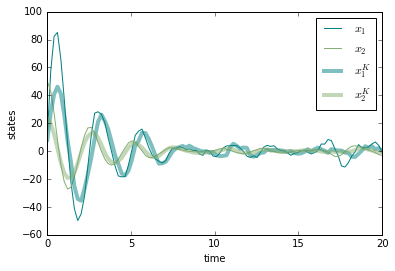

In [6]:
plt.plot(t,true_states[:,0],alpha=1,color='teal') 
plt.plot(t,true_states[:,1],alpha=1,color='sage') 
plt.plot(t,filtered_states[:,0],alpha=0.5,lw=4,color='teal') 
plt.plot(t,filtered_states[:,1],alpha=0.5,lw=4,color='sage') 

plt.legend(['$x_1$','$x_2$','$x_1^{K}$','$x_2^{K}$'])
plt.xlabel('time')
plt.ylabel('states')